# **AIN 214 - PA2 - FALL 2025**

**Student Number** : 2240765020

**Name Surname**   : Sude Gündüz


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 24.11.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [129]:
# Import required python modules
import pandas as pd
import sqlite3

# **PART- 1**

**Superstore Sales Management System (50 Points)**



For this part, you will use a dataset from a Superstore retail company. The dataset includes comprehensive information about customers, products, orders, and sales operations across different regions in the United States.

**Dataset Entities**

* **Customers**: The system contains detailed customer profiles including customer ID, name, and segment information (Consumer, Corporate, Home Office). Understanding customer demographics and purchasing behavior is essential for targeted marketing and customer relationship management.

* **Products**: A comprehensive catalog of all products sold by the superstore. Each product record includes a unique product ID, product name, category (Furniture, Office Supplies, Technology), and sub-category. This information is crucial for inventory management, product performance analysis, and strategic planning.

* **Locations**: Geographic information about where customers are located and where orders are shipped. Includes city, state, postal code, region (Central, East, South, West), and country. This data enables regional sales analysis and helps optimize distribution and shipping strategies.

* **Orders**: Tracks all purchase transactions made by customers. Each order contains the order date, ship date, shipping mode (Standard Class, Second Class, First Class, Same Day), and links to customer and location information. This serves as the foundation for analyzing sales trends, shipping efficiency, and customer purchasing patterns.

* **Order Details**:  Detailed line items for each order, recording which products were purchased, quantity, sales amount, discount applied, and profit generated. This granular data is essential for profitability analysis, discount impact assessment, and understanding product performance at the transaction level.


This dataset will be used to design a normalized relational database for managing retail operations. Your task is to build an efficient database schema, establish proper relationships between tables, and write SQL queries to extract meaningful business insights.


**Dataset Columns**

* **Row ID**: Unique identifier for each row in the dataset (sequential number)
* **Order ID**: Unique identifier for each order (format: XX-YYYY-NNNNNN). Multiple rows can have the same Order ID if the order contains multiple products
* **Order Date**: Date when the order was placed by the customer (format: MM/DD/YYYY)
* **Ship Date**: Date when the order was shipped to the customer (format: MM/DD/YYYY)
* **Ship Mode**: Shipping method selected for the order (Standard Class, Second Class, First Class, Same Day)
* **Customer ID**: Unique identifier for each customer (format: XX-NNNNN)
* **Customer Name**: Full name of the customer who placed the order
* **Segment**: Customer segment classification (Consumer, Corporate, Home Office)
* **Country**: Country where the customer is located (all orders are from United States)
* **City**: City name where the order is being shipped
* **State**: US state where the order is being shipped (2-letter state code)
* **Postal Code**: ZIP code of the delivery location (5-digit postal code)
* **Region**: Geographic region classification (Central, East, South, West)
* **Product ID**: Unique identifier for each product (format: XXX-XX-NNNNNNN)
* **Category**: High-level product category (Furniture, Office Supplies, Technology)
* **Sub-Category**: Detailed product classification within the category (e.g., Chairs, Phones, Binders)
* **Product Name**: Full descriptive name of the product
* **Sales**: Revenue generated from the product sale in US Dollars ($)
* **Quantity**: Number of units of the product purchased in the order
* **Discount**: Discount rate applied to the product (decimal value between 0 and 1, where 0.2 = 20% discount)
* **Profit**: Profit earned from the sale after deducting costs and discounts in US Dollars ($). Can be negative if the sale resulted in a loss

---


**Dataset Path:** "Data/Sample - Superstore.csv"
  
---

**Technical Requirements**
* **Databas**: Use sqlite3 Python package for in-memory database management
* **Libraries**: Use pandas for data manipulation

**Note** You can use either pandas or sqlite3 for query execution.

---
**Notes on Database Implementation**

All database operations should be performed in-memory using SQLite. This means:
* Database exists only during program execution
* No persistent file is created
* Fast performance for analysis tasks
* Connection should remain open throughout all questions

---

### Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database(10pts).

Your database design here
---
---
***Example Table***:


| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| ID       | INTEGER| PK      | Unique identifier table1                 |
| ID2      | INTEGER| FK      | identifier table2                        |
| Name     | TEXT   |         | patient name                             |
| FOREIGN KEY (ID2) REFERENCES table2(ID2)     |    |          |         |

Table 1: Customers
| Attribute | Type | Key | Description |
|:---|:---|:---|:---|
| **customer\_id** | TEXT | **PK** | Unique identifier for each customer |
| customer\_name | TEXT | | Full name of the customer |
| segment | TEXT | | Customer segment (Consumer, Corporate, Home Office) |

Table 2: Products
| Attribute | Type | Key | Description |
|:---|:---|:---|:---|
| **product\_id** | TEXT | **PK** | Unique identifier for each product |
| product\_name | TEXT | | Full name of the product |
| category | TEXT | | Product high-level category |
| sub\_category | TEXT | | Product sub-category |

Table 3: Orders
| Attribute | Type | Key | Description |
|:---|:---|:---|:---|
| **order\_id** | TEXT | **PK** | Unique identifier for the transaction |
| customer\_id | TEXT | **FK** | Identifier for `Customers` table |
| order\_date | TEXT | | Date the order was placed |
| ship\_date | TEXT | | Date the order was shipped |
| ship\_mode | TEXT | | Shipping method |

Table 4: OrderDetails
| Attribute | Type | Key | Description |
|:---|:---|:---|:---|
| **row\_id** | INTEGER | **PK** | Unique identifier for each line item |
| order\_id | TEXT | **FK** | Identifier for `Orders` table |
| product\_id | TEXT | **FK** | Identifier for `Products` table |
| sales | REAL | | Revenue generated by this line item |
| quantity | INTEGER | | Quantity of product sold |
| discount | REAL | | Discount rate applied |
| profit | REAL | | Profit generated by this line item |

Table 5: Location
| Attribute | Type | Key | Description |
|:---|:---|:---|:---|
| customer\_id | TEXT | **FK** | Identifier for `Customers` table |
| order\_id | TEXT | **FK** | Identifier for `Orders` table |
| country | TEXT | | Country of sale |
| city | TEXT | | City of sale |
| state | TEXT | | State of sale |
| postal\_code | INTEGER | | Postal code of the order |
| region | TEXT | | Geographical region |

In [130]:
# code implementation
df = pd.read_csv("Data/Sample - Superstore.csv", encoding='cp1252')
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE Customers(
    customer_id TEXT,
    customer_name TEXT,
    segment TEXT,
    PRIMARY KEY(customer_id)         
               );
""")
cursor.execute("""
CREATE TABLE Products(
    product_id TEXT,
    product_name TEXT,
    category TEXT,
    sub_category TEXT,
    PRIMARY KEY(product_id)         
               );
""")
cursor.execute("""
CREATE TABLE Orders(
    order_id TEXT,
    customer_id TEXT,
    order_date TEXT,
    ship_date TEXT,
    ship_mode TEXT,
    PRIMARY KEY(order_id)
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id)        
               );
""")
cursor.execute("""
CREATE TABLE Location(
    customer_id TEXT,
    order_id TEXT,
    country TEXT,
    city TEXT,
    state TEXT,
    postal_code INTEGER,
    region TEXT,
    FOREIGN KEY (order_id) REFERENCES Orders(order_id),
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id)         
               );
""")
cursor.execute("""
CREATE TABLE OrderDetails(
    row_id INTEGER,
    order_id TEXT,
    product_id TEXT,
    sales REAL,
    quantity INTEGER,
    discount REAL,
    profit REAL,
    PRIMARY KEY(row_id),
    FOREIGN KEY (product_id) REFERENCES Products(product_id),
    FOREIGN KEY (order_id) REFERENCES Orders(order_id)         
               );
""")

customers_table = df[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates(subset=['Customer ID']).values.tolist()
cursor.executemany("""
INSERT INTO Customers (
    customer_id, customer_name, segment
) VALUES (?, ?, ?)
""",customers_table)

products_table = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].drop_duplicates(subset=['Product ID']).values.tolist()
cursor.executemany("""
INSERT INTO Products (
    product_id, product_name, category, "sub_category"
) VALUES (?, ?, ?, ?)
""", products_table)

orders_table = df[['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Ship Mode']].drop_duplicates(subset=['Order ID']).values.tolist()
cursor.executemany("""
INSERT INTO Orders (
    order_id, customer_id, order_date, 
    ship_date, ship_mode
) VALUES (?, ?, ?, ?, ?)
""", orders_table)

order_details_table = df[['Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].values.tolist()
cursor.executemany("""
INSERT INTO OrderDetails (
    row_id, order_id, product_id, sales, quantity, discount, profit
) VALUES (?, ?, ?, ?, ?, ?, ?)
""", order_details_table)

location_table = df[['Customer ID', 'Order ID', 'Country', 'City', 'State', 'Postal Code', 'Region']].values.tolist()
cursor.executemany("""
INSERT INTO Location (
    customer_id, order_id, country, city, state, postal_code, region
) VALUES (?, ?, ?, ?, ?, ?, ?)
""", location_table)

conn.commit()

### Q2. Write a SQL query to identify the top 10 products by total profit(10pts).

The result should include:

* **Product ID**
* **Product Name**
* **Category**
* **Sub-category**
* **Total Number of Sales**
* **Total Profit**
* **Profit Margin**

**Hint**: profit_margin = (total_profit/total_sales)

In [131]:
# Implementation here
query="""
SELECT p.product_id, product_name, category, sub_category, SUM(sales) AS total_sales, SUM(profit) AS total_profit, SUM(profit)/SUM(sales) AS profit_margin
FROM Products p
JOIN OrderDetails o
    ON p.product_id=o.product_id
GROUP BY p.product_id
ORDER BY total_profit DESC
LIMIT 10
"""
result_df = pd.read_sql_query(query, conn)
print(result_df)

        product_id                                       product_name  \
0  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
1  OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
2  TEC-CO-10001449               Hewlett Packard LaserJet 3310 Copier   
3  TEC-CO-10003763                 Canon PC1060 Personal Laser Copier   
4  TEC-AC-10002049          Logitech G19 Programmable Gaming Keyboard   
5  TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer ...   
6  TEC-MA-10003979                  Ativa V4110MDD Micro-Cut Shredder   
7  TEC-MA-10001047   3D Systems Cube Printer, 2nd Generation, Magenta   
8  OFF-BI-10001120               Ibico EPK-21 Electric Binding System   
9  TEC-MA-10000045                  Zebra ZM400 Thermal Label Printer   

          category sub_category  total_sales  total_profit  profit_margin  
0       Technology      Copiers    61599.824    25199.9280       0.409091  
1  Office Supplies      Binders    27453.384

### Q3. Analyze customer purchasing patterns across different segments(10pts). ,

Create a query that shows:

* **Segment**
* **Number of Customers**
* **Total Orders**
* **Total Sales**
* **Total Profit**
* **Average Order Value**
* **Average Profit per Customer**

Compare the three segments (Consumer, Corporate, Home Office). Which segment is most profitable?

**Hint**:

average_order_value = (total_sales/total_orders)
average_profit_per_customer = (total_profit/distinct_customer_count)

In [132]:
# implementation here
query="""
SELECT segment, COUNT(DISTINCT c.customer_id) AS distinct_customer_count,
        COUNT(DISTINCT o.order_id) AS total_orders, 
        SUM(d.sales) AS total_sales, SUM(d.profit) AS total_profit,
        SUM(d.sales)/COUNT(DISTINCT o.order_id) AS average_order_value,
        SUM(d.profit)/COUNT(DISTINCT c.customer_id) AS average_profit_per_customer
FROM Customers c
JOIN Orders o
    ON c.customer_id=o.customer_id
JOIN OrderDetails d
    ON o.order_id=d.order_id
GROUP BY segment
ORDER BY average_profit_per_customer DESC
"""
result_df = pd.read_sql_query(query, conn)
print(result_df)

       segment  distinct_customer_count  total_orders   total_sales  \
0  Home Office                      148           909  4.296531e+05   
1    Corporate                      236          1514  7.061464e+05   
2     Consumer                      409          2586  1.161401e+06   

   total_profit  average_order_value  average_profit_per_customer  
0    60298.6785           472.665730                   407.423503  
1    91979.1340           466.411075                   389.742093  
2   134119.2092           449.111116                   327.919827  


As we can see from the output segment 'Home Office' is most profitable. Following with segment 'Corporate' and then segment 'Consumer' is the least profitable.

### Q4. Write a SQL query to analyze sales performance across different regions and categories(10pts).

The result should include:

* **Region**
* **Category**
* **Total sales**
* **Total Profit**
* **Total Quantity Sold**
* **Average Discount**

Group by both region and category. Order by region and total sales.
Identify which category performs best in each region.

In [133]:
# implementation here
query="""
SELECT region, category, SUM(sales) AS total_sales, SUM(profit) AS total_profit, SUM(quantity) AS total_quantity, AVG(discount) AS avg_discount
FROM OrderDetails o
JOIN Location l
    ON o.order_id=l.order_id
JOIN Products p
    ON o.product_id=p.product_id
GROUP BY region,category
ORDER BY region , total_sales DESC
"""
result_df = pd.read_sql_query(query, conn)
print(result_df)

     region         category  total_sales  total_profit  total_quantity  \
0   Central       Technology  527809.5470   103828.1471            4330   
1   Central  Office Supplies  497907.3060    17155.6502           15723   
2   Central        Furniture  466026.1298    -1670.8046            5266   
3      East       Technology  859868.5820   145017.4497            6201   
4      East        Furniture  734953.0790    13632.2236            7044   
5      East  Office Supplies  596295.3480   116151.5627           19437   
6     South       Technology  549448.5990    67007.8159            3462   
7     South  Office Supplies  381383.8000    59940.2372           11364   
8     South        Furniture  347878.9775    22278.6204            3586   
9      West       Technology  742663.7480   117820.0451            7084   
10     West        Furniture  718882.2225    23880.4678            7768   
11     West  Office Supplies  690967.3890   168043.5869           22265   

    avg_discount  
0    

The Technology category is the top-selling category in all four regions.
The East region's Technology sales are the highest overall.

### Q5. Find which products are frequently bought together in the same order(10pts).

**Requirements**:

* Identify top 10 product pairs that appear in the same orders most frequently
* Show: product_1, product_2, times_bought_together, total_revenue_from_pair
* Exclude pairs where product_1 = product_2

**Hint**

Self-join Order_Details on order_id where product_id differs

In [134]:
# implementation here
query="""
SELECT  p1.product_name AS product_1_name,
        p2.product_name AS product_2_name,
        COUNT(*) AS times_bought_together,
        SUM(o.sales + d.sales) AS total_revenue_from_pair
FROM OrderDetails o
INNER JOIN OrderDetails d
    ON o.order_id = d.order_id
    AND o.product_id != d.product_id
JOIN Products p1
    ON o.product_id = p1.product_id
JOIN Products p2
    ON d.product_id = p2.product_id
GROUP BY o.product_id, d.product_id
ORDER BY times_bought_together DESC
LIMIT 10
"""
result_df = pd.read_sql_query(query, conn)
print(result_df)
conn.close()

                                      product_1_name  \
0         O'Sullivan 4-Shelf Bookcase in Odessa Pine   
1              DMI Eclipse Executive Suite Bookcases   
2  SAFCO Optional Arm Kit for Workspace Cribbage ...   
3  Global Leather Highback Executive Chair with P...   
4  Global Leather Highback Executive Chair with P...   
5  Global Commerce Series High-Back Swivel/Tilt C...   
6                         Hon Valutask Swivel Chairs   
7    DAX Value U-Channel Document Frames, Easel Back   
8                        Eldon Wave Desk Accessories   
9  Eldon Expressions Wood and Plastic Desk Access...   

                                      product_2_name  times_bought_together  \
0  GBC Standard Recycled Report Covers, Clear Pla...                      2   
1                                          Avery 485                      2   
2  Belkin Premiere Surge Master II 8-outlet surge...                      2   
3                       G.E. Halogen Desk Lamp Bulbs               

# **Part 2. Data Analysis and Visualization(50pts)**

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this part, you'll explore and visualize data from the Netflix Movies and TV Shouws Dataset.
Your goal is to get insights about Netflix's contents and trends. What types of shows are most common,
how the Netflix content has evolved, and how content varies across countries and genres.

You will perform **data manipulation** and **visualization** using Python (`pandas`, `numpy`, `matplotlib`).

**Your answers should include code, charts and written interpretation.**

## Dataset

The dataset we use in this part is **"Netflix Movies and TV Shows"**.

Columns include:
`show_id`, `type`, `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in`, `description`, `month_added`, `month_name_added`, `year_added`

Start working by importing the dataset into a pandas DataFrame.

In [136]:
# implementation here
netflix_df=pd.read_csv("Data/netflix_titles.csv")

### Q1. Content Type Analysis(5pts)

- What proportion of titles on Netflix are Movies vs TV Shows?

Start by examining how many records belong to each type. Visualize the distribution (e.g. pie chart) and report which category dominates the Netflix library.

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


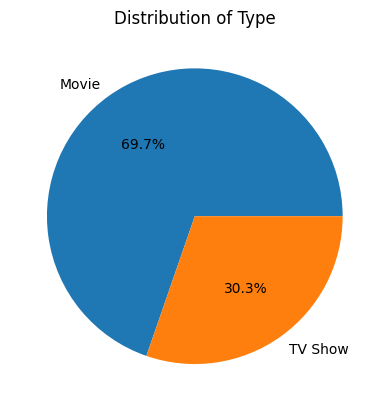

In [137]:
# implementation here
type_counts = netflix_df["type"].value_counts()
print(type_counts)

#plotting the pie chart
counts=type_counts.values
labels=type_counts.index
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of Type")
plt.show()

I chose **pie chart** for this data because it is easier to see the proportion and compare the titles. If we look at the pie chart we can see that Netflix library is overwhelmingly dominated by ***Movies***.

### Q2. Time Trends(5pts)

- How has the number of titles added to Netflix changed over time?

Use the release time information from the dataset and count how many titles were added each year. Visualize the trend with a plot to show how Netflix's catalog has grown over time.

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


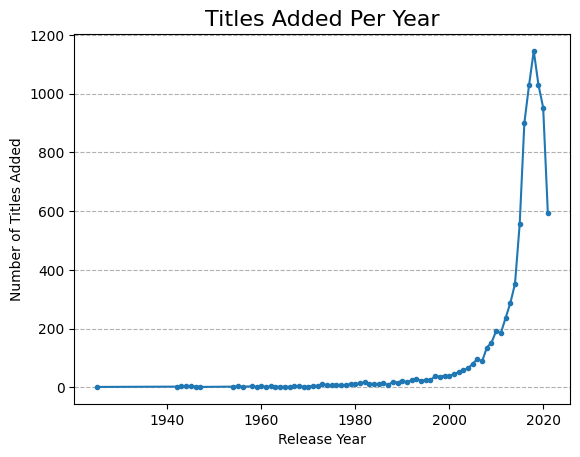

In [138]:
# implementation here
count_per_year=netflix_df["release_year"].value_counts().sort_index()
print(count_per_year)
years=count_per_year.index
counts=count_per_year.values
plt.plot(years,counts,marker='o', linestyle='-',markersize=3)
plt.title("Titles Added Per Year", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Added")
plt.grid(axis='y', linestyle='--')
plt.show()

To see the changed over time it is best to use ***line plot***. And as we can see from the plot titles added per year increased from 1925 to 2018 and had it's peak in **2018** then started to decrease.

### Q3. Genre Analysis(5pts)

- What are the 10 most common genres on Netflix?

The `listed_in` column contains the genre information. But it can contain multiple genres, seperated by commas. Split these into individual genre values and count how often each one appears. Plot the top 10 genres in a chart and describe the plot in 1-2 sentences.

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


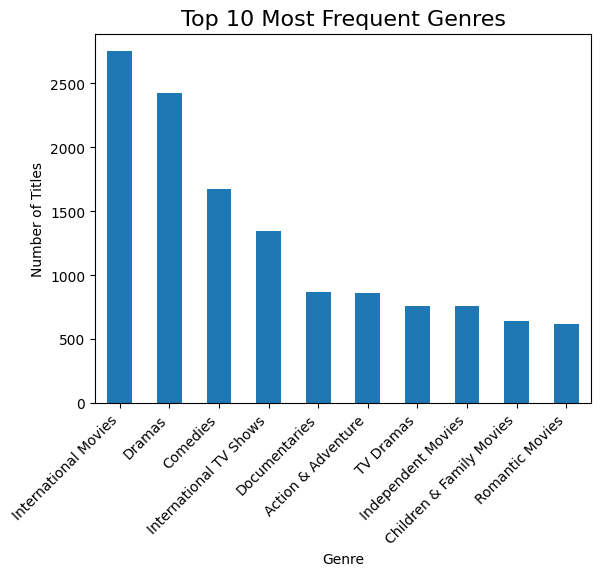

In [139]:
# implementation here
#splitting the multi-genre columns
genre_list=netflix_df["listed_in"].str.split(',').explode()
genre_list = genre_list.str.strip()
genre_counts=genre_list.value_counts()
top_10_genre=genre_counts.sort_values(ascending=False).head(10)
print(top_10_genre)
#plotting the chart
top_10_genre.plot(kind='bar')
plt.title('Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

I chose **bar chart** because it is the most effective visualization for categorical data and to compare the counts. The bar chart clearly shows that ***International Movies*** is the most frequent genre, followed by Dramas and Comedies.

### Q4. Geographic Patterns(5pts)

- Which 10 countries have produced the most Netflix titles?

Some titles are produced by multiple countries (e.g., "France, Germany"). Ensure you account for all countries evenly by splitting the entries before counting. Show the top contributors using a chart.

country
United States     3641
India              857
United Kingdom     594
Canada             346
France             313
Japan              291
Spain              210
South Korea        202
Germany            186
Mexico             145
Name: count, dtype: int64


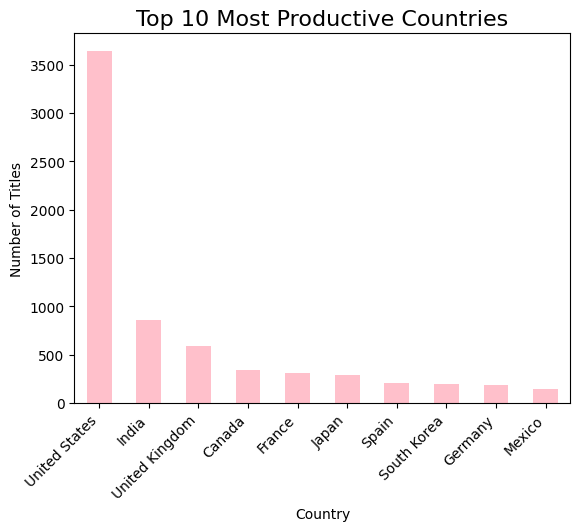

In [140]:
# implementation here
#splitting the multi-country columns
df_exploded=netflix_df.assign(country=netflix_df["country"].str.split(',').explode("country"))
df_exploded["country"]=df_exploded["country"].str.strip()
country_counts=df_exploded["country"].value_counts()
#finding top 10 countries
top_10_country=country_counts.head(10)
print(top_10_country)
#plotting the chart
top_10_country.plot(kind='bar', color='pink')
plt.title('Top 10 Most Productive Countries', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart clearly shows that ***United States*** is the most productive country by a large margin , followed by **India** and **United Kingdom**.

### Q5. Titles Added per Month(5pts)

- How many titles are added to Netflix in each month?

Use the release time information from the dataset. And report the added titles by "Month-Year" (e.g. "June-2016) then present it by a chart. You will manipulate the data to get that information. Then describe&comment on the chart with 1-2 sentences.

Month-Year
January-2008        1
February-2008       1
May-2009            1
November-2009       1
November-2010       1
                 ... 
May-2021          132
June-2021         207
July-2021         257
August-2021       178
September-2021    183
Name: count, Length: 108, dtype: int64


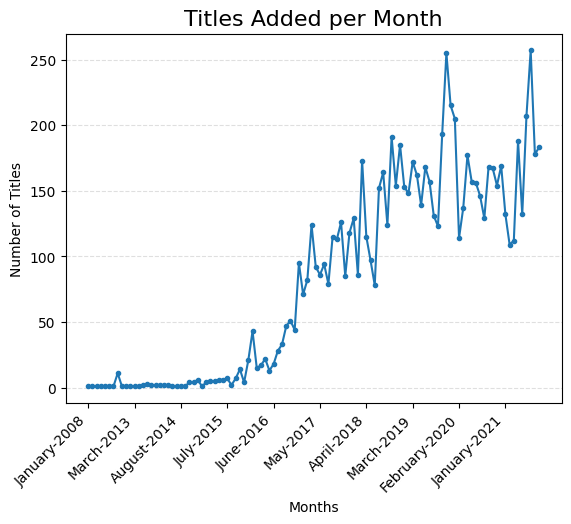

In [141]:
# implementation here
#manipulating the data to make "Month-Year" column
netflix_df["Month-Year"] = pd.to_datetime(netflix_df["month_name_added"].astype(str) +"-"+ netflix_df["year_added"].astype(str),format="%B-%Y")
titles_per_month = netflix_df["Month-Year"].value_counts().sort_index()
titles_per_month.index = titles_per_month.index.strftime("%B-%Y")
print(titles_per_month)
#plotting the chart
tick_frequency = 11 # Show one label per year
x_indices = range(0, len(titles_per_month), tick_frequency)
x_ticks = titles_per_month.index[::tick_frequency]
titles_per_month.plot(kind='line', marker='o', linestyle='-', markersize=3)
plt.title('Titles Added per Month', fontsize=16)
plt.xlabel('Months')
plt.ylabel('Number of Titles')
plt.xticks(x_indices, x_ticks,rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.4, linestyle='--')
plt.show()

The chart shows that very few titles were added between **2008** and **2016**. However, starting in **2017**, the rate of new titles started to grow and in the recent years there is a high variabilty and a lot of peaks.

### Q6. Country Contribution Over Time(10pts)

- Identify the top 10 content producing countries.
- For the top 5 producing countries, how has the number of titles added changed year by year?

Identify the top 10 countries by counting total contents. Plot the results. Then identify the 5 countries with the most titles overall, and filter the dataset to just those. Group by both year added and country, and plot separate lines to compare their trends over time. Visualize the result and describe&comment on the chart with 1-2 sentences.

country
United States     3641
India              857
United Kingdom     594
Canada             346
France             313
Japan              291
Spain              210
South Korea        202
Germany            186
Mexico             145
Name: count, dtype: int64


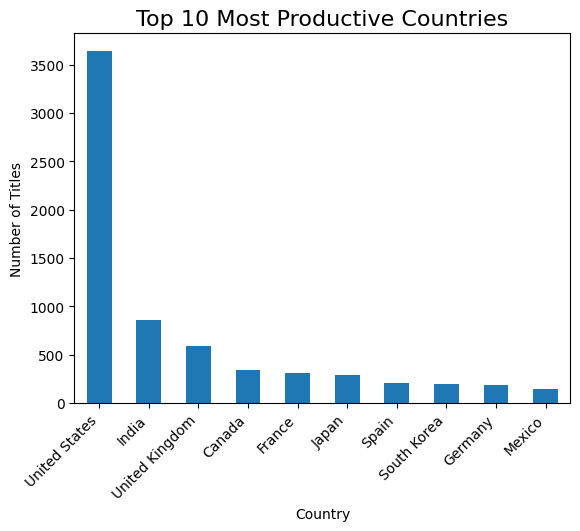

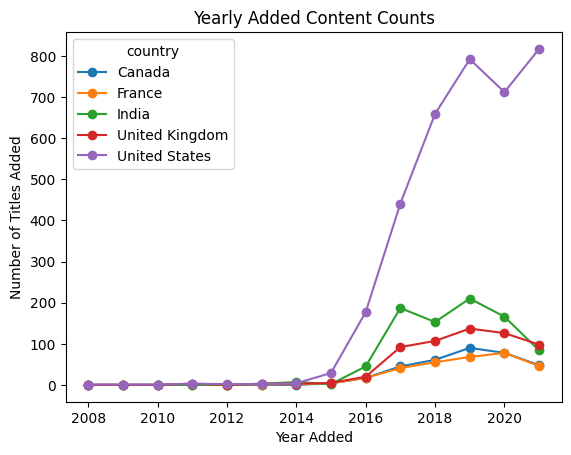

In [142]:
# implementation here
#data preparation
df_exploded=netflix_df.assign(country=netflix_df["country"].str.split(',').explode("country"))
df_exploded["country"]=df_exploded["country"].str.strip()
#top 10 countries plot
country_counts = df_exploded["country"].value_counts()
print(country_counts.head(10))
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Productive Countries', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()
#filtering the dataset
top_5_countries=country_counts.head(5).index
df_top_5=df_exploded[df_exploded["country"].isin(top_5_countries)]
yearly_counts=df_top_5.groupby(["year_added","country"]).size().unstack(fill_value=0)
#plotting
yearly_counts.plot(kind='line', marker='o', linestyle='-')
plt.title("Yearly Added Content Counts")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.show()

A **multi-line plot** is chosen because it allows us to compare how different countries' yearly added titles change over time on the same timeline. The chart shows that after 2015 the United States experienced a dramatic increase in number of titles added. The other countries also grew during this period.

### Q7. Average Movie Duration Over Time(5pts)

- How has the average movie duration changed over the years?

Focus only movies on the dataset (ignore TV Shows). Convert the duration column to a numeric value. And group by release year to compute the average movie length per year and visualize the trend.
Describe the chart with 1-2 sentences.

release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    95.611765
2018    96.185137
2019    93.466035
2020    92.141199
2021    96.444043
Name: duration_in_minutes, Length: 73, dtype: float64


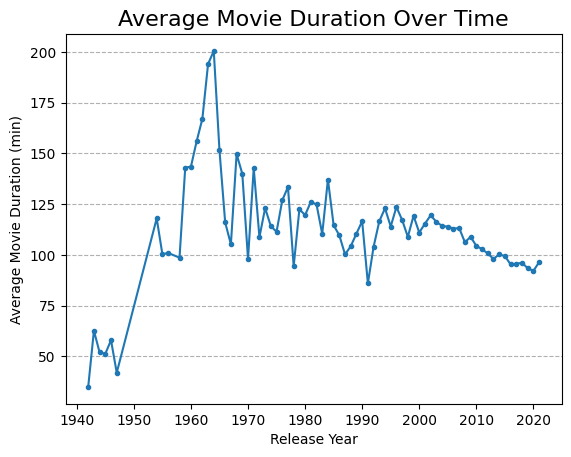

In [143]:
# implementation here
movies_df = netflix_df[netflix_df["type"]=="Movie"].copy()
#converting the duration to a numeric value
movies_df["duration_in_minutes"] = movies_df["duration"].str.replace("min","").astype(int)
avg_duration_per_year = movies_df.groupby("release_year")["duration_in_minutes"].mean()
print(avg_duration_per_year)
#plotting the chart
duration=avg_duration_per_year.values
years=avg_duration_per_year.index
plt.plot(years,duration,marker='o', linestyle='-',markersize=3)
plt.title("Average Movie Duration Over Time", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Average Movie Duration (min)")
plt.grid(axis='y', linestyle='--')
plt.show()

The chart shows that movie durations in the earlier years were very long and have it's peak between **1960-1970 years**. Since then the average movie duration been getting shorter and now averages around 100 minutes.

### Q8. TV Shows - Average Number of Seasons per Country(5pts)

- For each country, what is the average number of seasons in its TV Shows?

Focus only TV Shows on the dataset. The duration column contains the number of seasons (e.g. "3 Seasons"). Parse this information to a usable format. Then compute the average per country and visualize the top 10 countries. This gives insight about the countries tends to produce longer-running TV series.

country
Norway            8.000000
Jordan            5.000000
Mauritius         4.000000
Finland           3.000000
Pakistan          2.666667
Australia         2.375000
China             2.333333
Singapore         2.333333
United Kingdom    2.127660
Brazil            2.100000
Name: season_count, dtype: float64


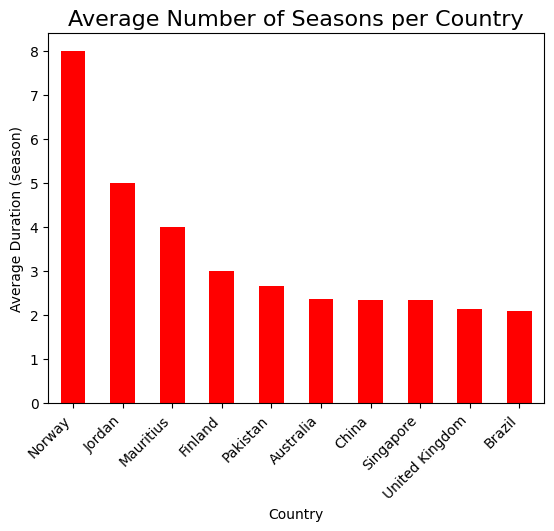

In [144]:
# implementation here
tvshow_df = netflix_df[netflix_df["type"]=="TV Show"].copy()
#parsing the season info as integer
tvshow_df["season_count"] = tvshow_df["duration"].str.replace(" Season(s)?", "",regex=True).astype(int)
tvshow_df = tvshow_df.assign(country=tvshow_df['country'].str.split(',').explode('country'))
tvshow_df["country"]=tvshow_df["country"].str.strip()
tvshow_df = tvshow_df[tvshow_df["country"].astype(bool)]
#finding top 10 countries by average number of seasons
avg_duration_per_country = tvshow_df.groupby("country")["season_count"].mean()
top_10_avg=avg_duration_per_country.sort_values(ascending=False).head(10)
print(top_10_avg)
#plotting the chart
top_10_avg.plot(kind='bar', color='red')
plt.title('Average Number of Seasons per Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Average Duration (season)')
plt.xticks(rotation=45, ha='right')
plt.show()

The chart shows that ***Norway*** has the highest average number of seasons per show, while most other countries have about 2–3 seasons on average. Overall, long-running series are relatively rare.

### Q9. Genre Popularity Shift Over Years(5pts)

- How has the popularity of the most popular 3 genres changed over time?

Choose 3 most popular genres (check Q3) and analyze how often titles of each genre were added per year. This will require splitting the multi-genre column, filtering by the chosen genres, and grouping by year. Plot a multi-line chart to show the trend on these genres over years.

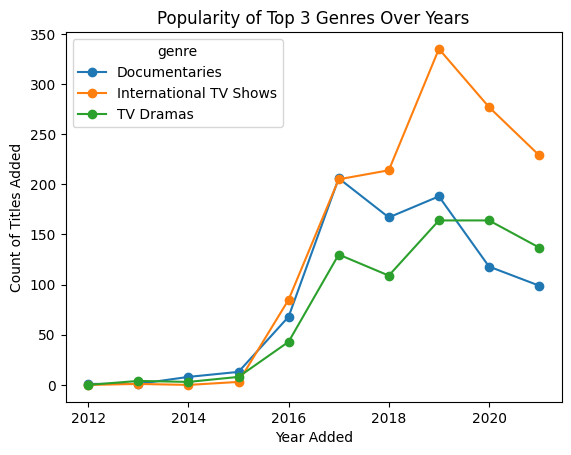

In [145]:
# implementation here
df_new = netflix_df.copy()
#splitting the multi-genre columns
df_new["genre"] = df_new["listed_in"].str.split(',')
df_new = df_new.explode("genre")
df_new["genre"] = df_new["genre"].str.strip()
#filtering by top 3 genres
df_top_3_genre=df_new[df_new["genre"].isin(genre_list.head(3))]
genre_counts=df_top_3_genre.groupby(["year_added","genre"]).size().unstack(fill_value=0)
#plotting the chart
genre_counts.plot(kind='line', marker='o', linestyle='-')
plt.title("Popularity of Top 3 Genres Over Years")
plt.xlabel("Year Added")
plt.ylabel("Count of Titles Added")
plt.show()

The chart shows that all three genres grew sharply after 2016, while ***International TV Shows*** experiencing the largest growth and peaking around 2019.

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.